In [ ]:

def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        return "Error: Image not found."
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    return "Tumor" if prediction[0] > 0.5 else "Normal"

image_path = "C://Users//Divisha//Downloads//Test_DL//Tumor- (1400).jpg"  # Replace this with the actual path to the image you want to predict
prediction = predict_image(image_path)
print(f'The prediction for the image is: {prediction}')

# Load the model
loaded_model = load_model('my_model.h5')

# Load training history
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

1/1 [==============================] - 0s 170ms/step
The prediction for the image is: Tumor






Epoch 1/5


138/138 [==============================] - 51s 347ms/step - loss: 0.2177 - accuracy: 0.9293 - val_loss: 0.1026 - val_accuracy: 0.9701
Epoch 2/5
138/138 [==============================] - 47s 339ms/step - loss: 0.1467 - accuracy: 0.9391 - val_loss: 0.1103 - val_accuracy: 0.9574
Epoch 3/5
138/138 [==============================] - 48s 345ms/step - loss: 0.1130 - accuracy: 0.9529 - val_loss: 0.0779 - val_accuracy: 0.9728
Epoch 4/5
138/138 [==============================] - 48s 348ms/step - loss: 0.0942 - accuracy: 0.9610 - val_loss: 0.0647 - val_accuracy: 0.9774
Epoch 5/5
35/35 [==============================] - 2s 61ms/step - loss: 0.0535 - accuracy: 0.9909
Test Loss: 0.0535, Test Accuracy: 0.9909


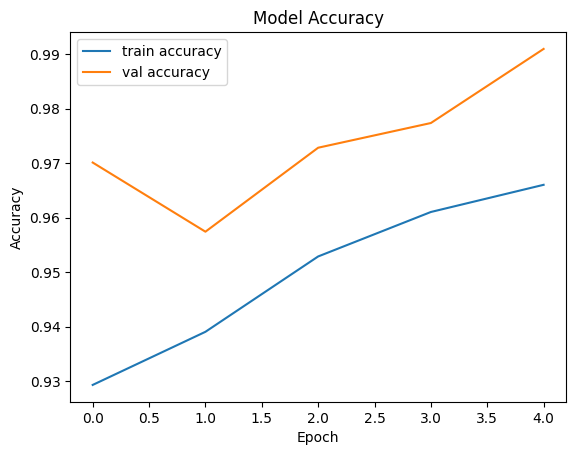

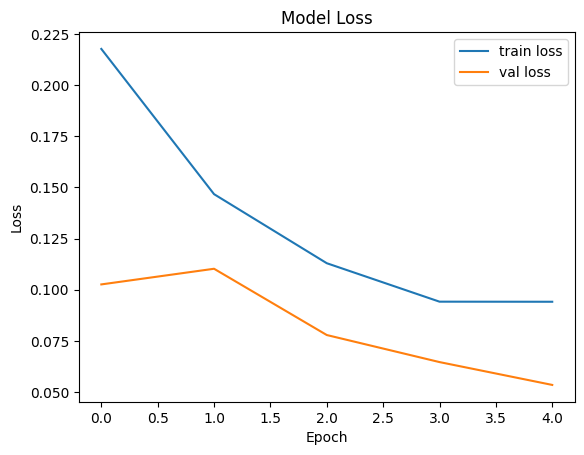

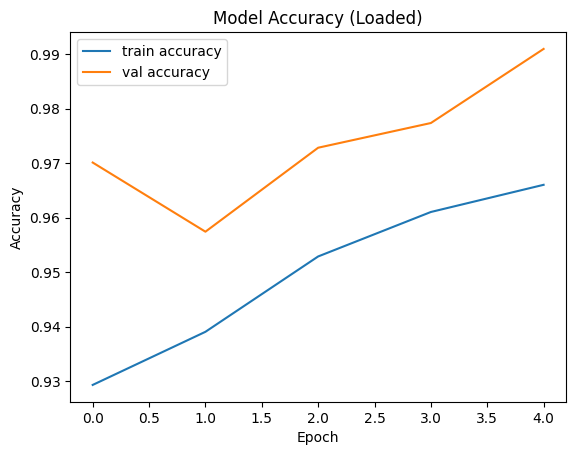

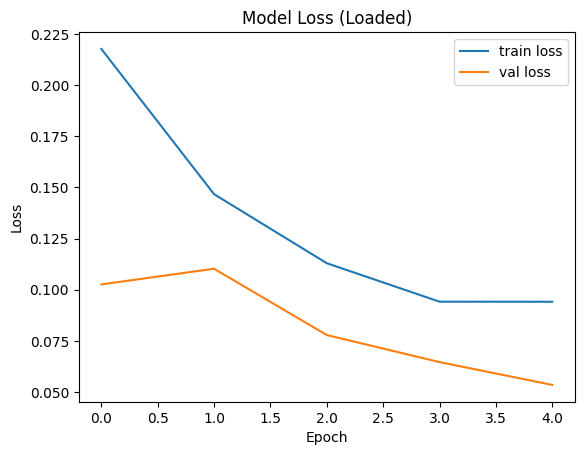

In [ ]:
import os
import numpy as np
import cv2
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


dataset_path = 'C://Users//Divisha//Desktop//dhruv study//DL project//dataset//dataset//dataset'  # Update this path

def load_data(dataset_path):
    images = []
    labels = []
    label_map = {'Normal': 0, 'Tumor': 1}
    
    for label in os.listdir(dataset_path):
        if label in label_map:
            for img_file in os.listdir(os.path.join(dataset_path, label)):
                img_path = os.path.join(dataset_path, label, img_file)
                image = cv2.imread(img_path)
                image = cv2.resize(image, (128, 128))  # Resize images
                images.append(image)
                labels.append(label_map[label])

    return np.array(images), np.array(labels)


X, y = load_data(dataset_path)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=5,
                    callbacks=[early_stopping])


model.save('my_model.keras')


with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()za
plt.show()


with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)


# Visualize the loaded history
plt.plot(loaded_history['accuracy'], label='train accuracy')
plt.plot(loaded_history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy (Loaded)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(loaded_history['loss'], label='train loss')
plt.plot(loaded_history['val_loss'], label='val loss')
plt.title('Model Loss (Loaded)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
